In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('housing_dataset.txt',
    header=None,
    sep=',')
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


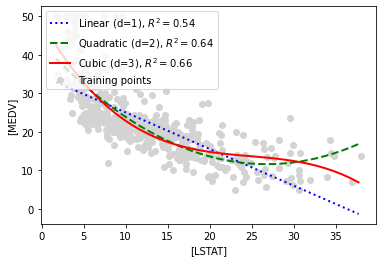

In [14]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict( quadratic.fit_transform ( X_fit ))
quadratic_r2 = r2_score(y,regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict (cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y,regr.predict(X_cubic))

plt.scatter(X,y,label ='Training points',color='lightgray')
plt.plot(X_fit, y_lin_fit,
    label ='Linear (d=1), $R^2=%.2f$' %linear_r2,
    color='blue',
    lw=2,
    linestyle =':')
plt.plot(X_fit , y_quad_fit ,
    label ='Quadratic (d=2), $R^2=%.2f$' %quadratic_r2,
    color='green',
    lw=2,
    linestyle ='--')
plt.plot(X_fit , y_cubic_fit ,
    label ='Cubic (d=3), $R^2=%.2f$' %cubic_r2,
    color='red',
    lw=2)
plt.xlabel('[LSTAT]')
plt.ylabel('[MEDV]')
plt.legend(loc='upper left' )
plt.show()